In [21]:
import openeo
import xarray as xr
import matplotlib.pyplot as plt



connection = openeo.connect(
    url="openeo.dataspace.copernicus.eu",
)
connection.authenticate_oidc()

spatial_extent = {"type":"Polygon","coordinates":[[[14.098274,40.941794],[14.098274,40.971144],[14.147026,40.971144],[14.147026,40.941794],[14.098274,40.941794]]]}
s2cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent = spatial_extent  ,
    temporal_extent=["2025-04-28", "2025-05-01"],
    bands=["B03", "B08"],

)




Authenticated using refresh token.


In [26]:
# by Bands...
green = s2cube.band("B03")
nir = s2cube.band("B08")
ndwi = (green - nir) / (green + nir)

ndwi.execute_batch("ndwi.nc",title="ndwi")

0:00:00 Job 'j-25050613135943d987474db6ba790f8f': send 'start'
0:00:13 Job 'j-25050613135943d987474db6ba790f8f': queued (progress 0%)
0:00:19 Job 'j-25050613135943d987474db6ba790f8f': queued (progress 0%)
0:00:25 Job 'j-25050613135943d987474db6ba790f8f': queued (progress 0%)
0:00:33 Job 'j-25050613135943d987474db6ba790f8f': queued (progress 0%)
0:00:43 Job 'j-25050613135943d987474db6ba790f8f': queued (progress 0%)
0:00:55 Job 'j-25050613135943d987474db6ba790f8f': queued (progress 0%)
0:01:10 Job 'j-25050613135943d987474db6ba790f8f': running (progress N/A)
0:01:29 Job 'j-25050613135943d987474db6ba790f8f': running (progress N/A)
0:01:54 Job 'j-25050613135943d987474db6ba790f8f': running (progress N/A)
0:02:23 Job 'j-25050613135943d987474db6ba790f8f': finished (progress 100%)


<BatchJob job_id='j-25050613135943d987474db6ba790f8f'>

In [27]:

ds = xr.load_dataset("ndwi.nc")
ds

<xarray.Dataset> Size: 1MB
Dimensions:  (t: 2, x: 415, y: 331)
Coordinates:
  * t        (t) datetime64[ns] 16B 2025-04-28 2025-04-29
  * x        (x) float64 3kB 4.241e+05 4.241e+05 ... 4.282e+05 4.282e+05
  * y        (y) float64 3kB 4.536e+06 4.536e+06 ... 4.533e+06 4.533e+06
Data variables:
    crs      |S1 1B b''
    var      (t, y, x) float32 1MB -0.01679 -0.008239 ... -0.4099 -0.3981
Attributes:
    Conventions:  CF-1.9
    institution:  Copernicus Data Space Ecosystem openEO API - 0.65.0a12.dev2...
    description:  
    title:

In [28]:
s2=ds.isel(t=1)

### Display ndwi

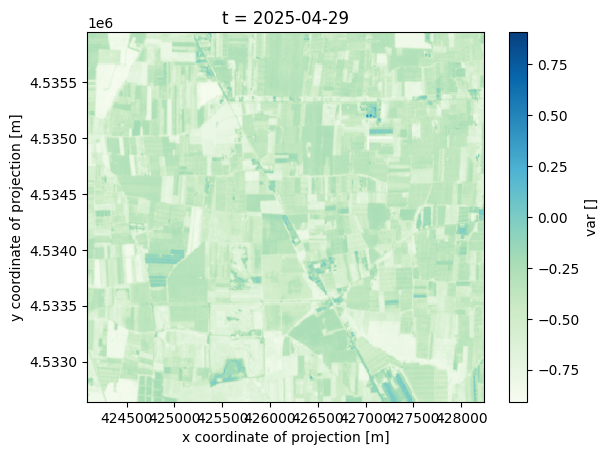

In [29]:
s2['var'].plot(cmap='GnBu')

### Using Matplotlib

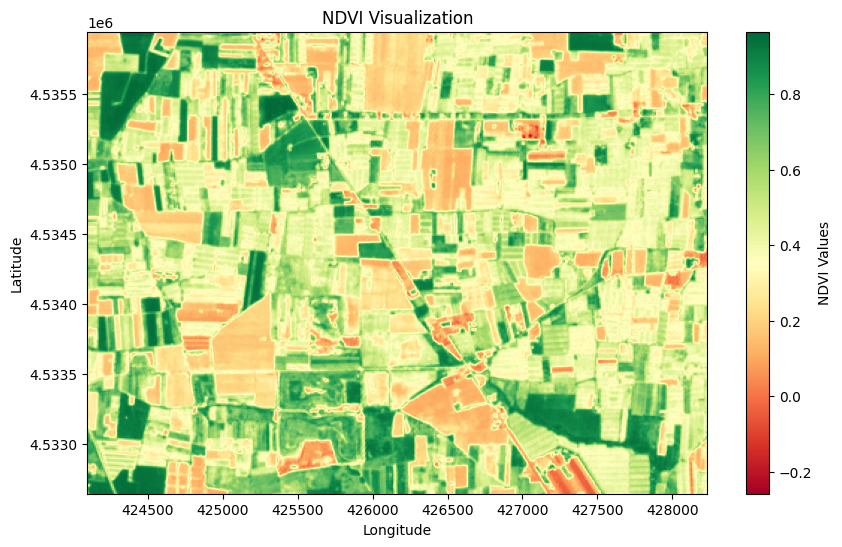

In [ ]:
import numpy as np

ndwi_array=s2.to_array()[1]
ndwi_data = ndwi_array.values.astype(np.float32)  # Assicurati che ndwi_data sia il tuo DataArray

# Crea la figura e l'asse
plt.figure(figsize=(10, 6))

# Visualizza l'array ndwi come immagine
plt.imshow(ndwi_data, cmap='RdYlGn', aspect='auto', extent=[ndwi_array.x.min(), ndwi_array.x.max(), ndwi_array.y.min(), ndwi_array.y.max()])
plt.colorbar(label='ndwi Values')
plt.title('ndwi Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Mostra il grafico
plt.show()